# Session 3 — Sentence-Level Analysis
## Measure 1: Sentence Length & Distribution
This notebook helps you split your text into sentences and compute:
- number of sentences
- average sentence length (in tokens and in characters)
- distribution / histogram of sentence lengths
- comparison across two texts/authors

Like before, we'll analyze Lewis Carroll's two Alice books as our example texts:
- Alice's Adventures in Wonderland
- Through the Looking-Glass

In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the books (Power + Human Nature)
def load_book(filepath):
    """Load and clean book text from a plain .txt file."""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # Optional cleanup for Gutenberg-style headers/footers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]

    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]

    return text.strip()

# IMPORTANT: this notebook assumes the .txt files are in ../data
# relative to the notebooks/ folder.
power_text = load_book('../data/48_laws_of_power.txt')
human_text = load_book('../data/laws_of_human_nature.txt')

print(f"The 48 Laws of Power: {len(power_text):,} characters")
print(f"The Laws of Human Nature: {len(human_text):,} characters")


The 48 Laws of Power: 1,278,268 characters
The Laws of Human Nature: 1,584,112 characters


In [11]:
# Analyze sentence length for both books
def analyze_sentences(text, book_name):
    """Split text into sentences and analyze lengths."""
    # Split on sentence boundaries
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]

    lengths_tokens = [len(s.split()) for s in sentences]
    lengths_chars = [len(s) for s in sentences]

    print(f"\n{'='*70}")
    print(book_name)
    print(f"{'='*70}")
    print(f"Number of sentences: {len(sentences):,}")
    print(f"Avg sentence length (tokens): {sum(lengths_tokens)/len(lengths_tokens):.2f}")
    print(f"Avg sentence length (chars): {sum(lengths_chars)/len(lengths_chars):.2f}")
    print(f"Min sentence length (tokens): {min(lengths_tokens)}")
    print(f"Max sentence length (tokens): {max(lengths_tokens)}")

    return sentences, lengths_tokens, lengths_chars

# Analyze both books
power_sents, power_tokens, power_chars = analyze_sentences(power_text, "The 48 Laws of Power")
human_sents, human_tokens, human_chars = analyze_sentences(human_text, "The Laws of Human Nature")



The 48 Laws of Power
Number of sentences: 10,970
Avg sentence length (tokens): 20.21
Avg sentence length (chars): 114.30
Min sentence length (tokens): 3
Max sentence length (tokens): 187

The Laws of Human Nature
Number of sentences: 14,214
Avg sentence length (tokens): 19.16
Avg sentence length (chars): 109.27
Min sentence length (tokens): 3
Max sentence length (tokens): 1595


Power sentences kept: 10945
Human Nature sentences kept: 14185


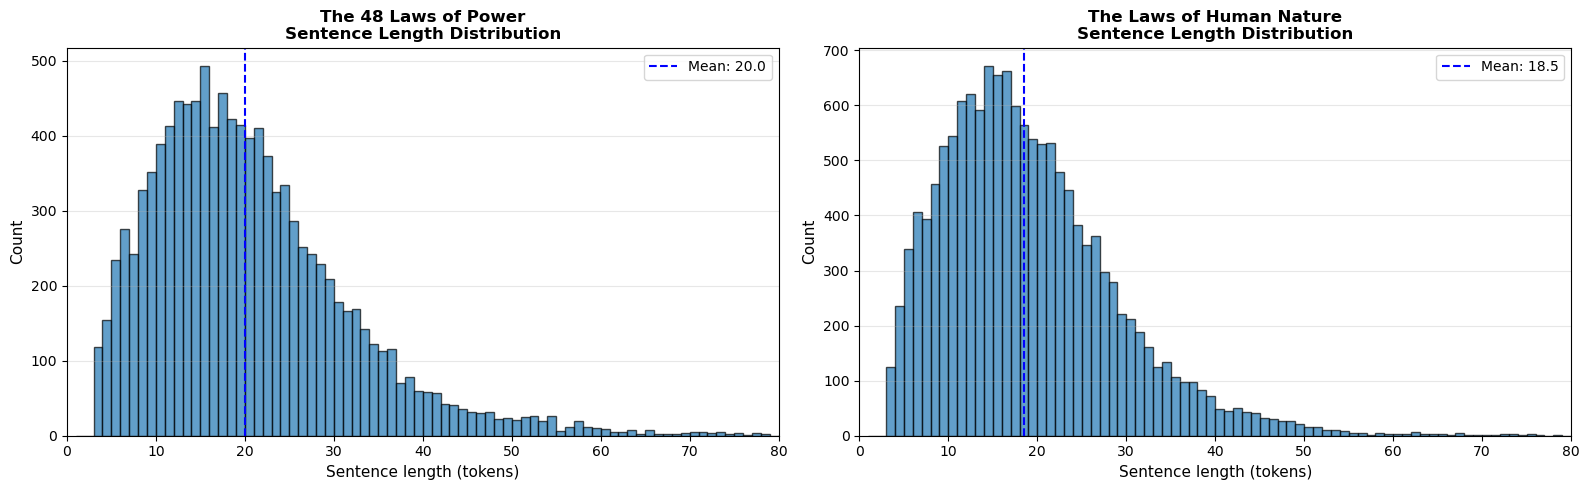

In [12]:
# ------------ STEP 1: FILTER OUT EXTREME SENTENCES (IMPORTANT) ------------

MAX_LEN = 80  # cutoff for sentence length (tokens)

# Filter sentence lengths so outliers do not distort the plot
power_lengths = [l for l in power_tokens if l <= MAX_LEN]
human_lengths = [l for l in human_tokens if l <= MAX_LEN]

print("Power sentences kept:", len(power_lengths))
print("Human Nature sentences kept:", len(human_lengths))


# ------------ STEP 2: PLOT BOTH DISTRIBUTIONS CLEANLY ------------

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ----- 48 Laws of Power -----
ax1 = axes[0]
ax1.hist(power_lengths, bins=range(1, MAX_LEN+2), alpha=0.7, edgecolor='black')
ax1.set_xlabel('Sentence length (tokens)', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title("The 48 Laws of Power\nSentence Length Distribution", fontsize=12, fontweight='bold')

# Mean line
ax1.axvline(sum(power_lengths)/len(power_lengths), linestyle='--', color='blue',
            label=f"Mean: {sum(power_lengths)/len(power_lengths):.1f}")
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xlim(0, MAX_LEN)


# ----- The Laws of Human Nature -----
ax2 = axes[1]
ax2.hist(human_lengths, bins=range(1, MAX_LEN+2), alpha=0.7, edgecolor='black')
ax2.set_xlabel('Sentence length (tokens)', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title("The Laws of Human Nature\nSentence Length Distribution", fontsize=12, fontweight='bold')

# Mean line
ax2.axvline(sum(human_lengths)/len(human_lengths), linestyle='--', color='blue',
            label=f"Mean: {sum(human_lengths)/len(human_lengths):.1f}")
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(0, MAX_LEN)


plt.tight_layout()
plt.show()


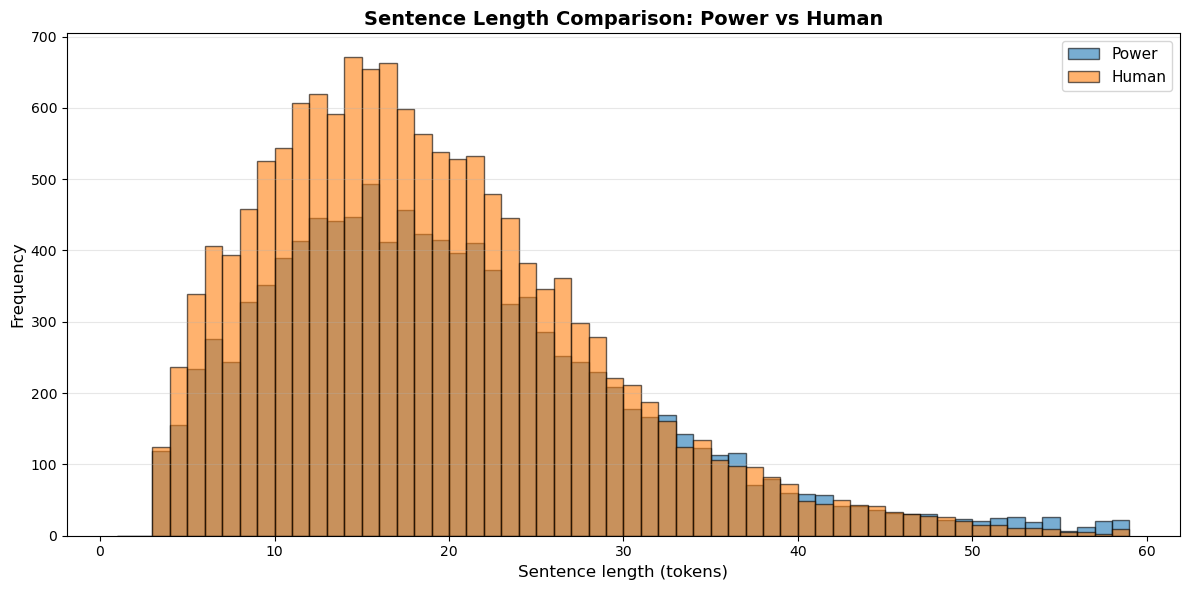


COMPARATIVE STATISTICS
Metric                                   Power           Human
----------------------------------------------------------------------
Mean sentence length                     20.21           19.16
Median sentence length                      18              17
Shortest sentence                            3               3
Longest sentence                           187            1595


In [13]:
# Compare both books side by side
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(power_tokens, bins=range(1, 60), alpha=0.6, label='Power', edgecolor='black')
ax.hist(human_tokens, bins=range(1, 60), alpha=0.6, label='Human', edgecolor='black')
ax.set_xlabel('Sentence length (tokens)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Sentence Length Comparison: Power vs Human', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*70)
print("COMPARATIVE STATISTICS")
print("="*70)
print(f"{'Metric':<30} {'Power':>15} {'Human':>15}")
print("-"*70)
print(f"{'Mean sentence length':<30} {sum(power_tokens)/len(power_tokens):>15.2f} {sum(human_tokens)/len(human_tokens):>15.2f}")
print(f"{'Median sentence length':<30} {sorted(power_tokens)[len(power_tokens)//2]:>15} {sorted(human_tokens)[len(human_tokens)//2]:>15}")
print(f"{'Shortest sentence':<30} {min(power_tokens):>15} {min(human_tokens):>15}")
print(f"{'Longest sentence':<30} {max(power_tokens):>15} {max(human_tokens):>15}")
